In [2]:
import numpy as np
#import matplotlib.pyplot as plt
import h5py

from helper_plotting import contourplot, linesplot, plot_flow_arrows, plot_conservation


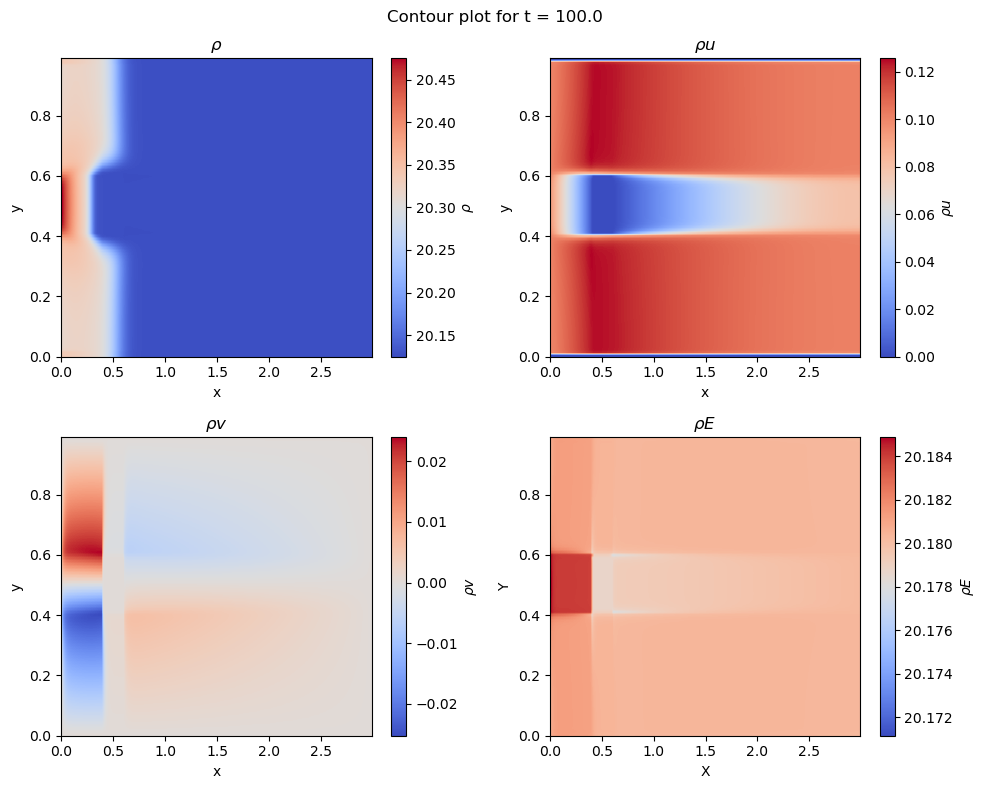

In [7]:
filename_save = "results/karman_t100.h5"

with h5py.File(filename_save, "r") as f:
    X = f["X"][:]  # Load x values
    Y = f["Y"][:]  # Load x values
    keys = list(f.keys())  # Get all keys in the file
    
    data = {}
    for key in keys:
        if "U" in key:
            data[float(key.split("U_")[1])] = f[key][:]  # Load data for the specified time step



n = -1
key = sorted(data.keys())[n]
contourplot(data[key], X, Y, title=f"Contour plot for t = {key}")  # Plot the final solution



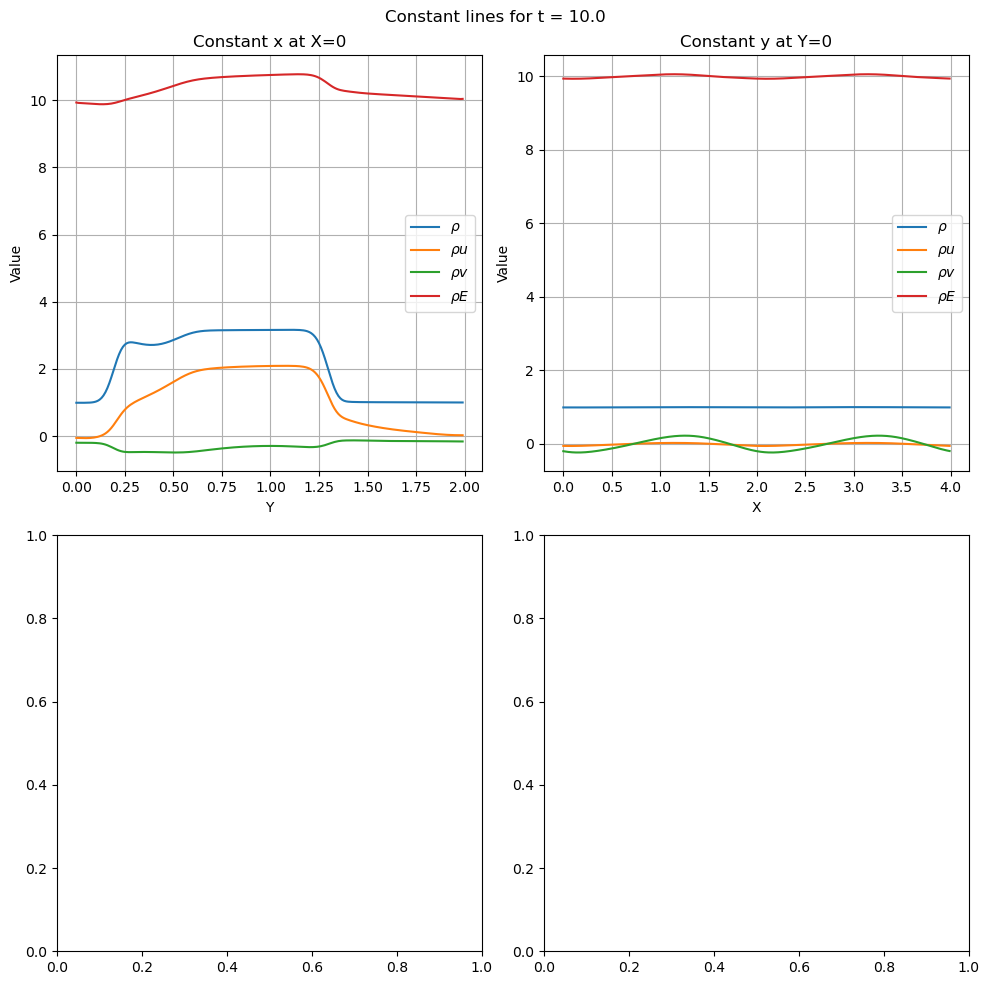

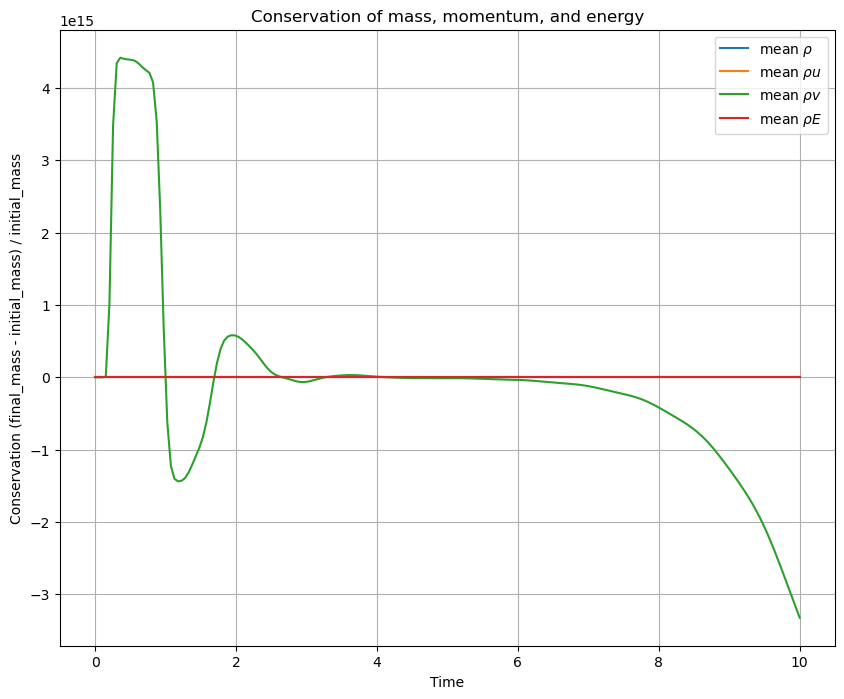

In [33]:
linesplot(data[key], X, Y, title=f"Constant lines for t = {key}")
plot_conservation(data)

In [ ]:
def initial_blast(X, Y):
    """
    Generate initial conditions for the blast problem using vectorized operations.

    Args:
        X (ndarray): Array of X coordinates.
        Y (ndarray): Array of Y coordinates.

    Returns:
        ndarray: Initial state vector for the Kelvin-Helmholtz instability problem.
    """
    X_grid, Y_grid = np.meshgrid(X, Y, indexing='ij')
    
    U_init = np.zeros((X_grid.shape[0], Y_grid.shape[1], 4))
    mask1 = (X_grid >= 0.8) & (Y_grid >= 0.8)
    mask2 = (X_grid <= 0.8) & (Y_grid >= 0.8)
    mask3 = (X_grid <= 0.8) & (Y_grid <= 0.8)
    mask4 = (X_grid >= 0.8) & (Y_grid <= 0.8)
    U_init[mask1] = [1.5, 0., 0., 1.5]
    U_init[mask2] = [0.5323, 1.206, 0., 0.3]
    U_init[mask3] = [0.1380, 1.206, 1.206, 0.029]
    U_init[mask4] = [0.5323, 0, 1.206, 0.3]

    return U_init
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
U_init = initial_blast(x, y)
contourplot(U_init, x, y, title="Initial conditions")
